# Time Series Modeling for Real Estate Investments: A Consultant's Guide to Identifying the Best Zip Codes using Zillow Research Data

## Overview

##### What do we mean by Real Estate?
Real estate refers to land, buildings, and other physical property, including natural resources such as crops, minerals, or water, that can be bought, sold, leased, or rented for various purposes. Real estate is a significant part of the global economy and is used for residential, commercial, industrial, and agricultural purposes. Real estate investments can provide both short-term and long-term returns through rental income, property appreciation, and value-added investments such as renovations and developments.


>With a population of over 330 million, The real estate industry in the USA is a significant contributor to the country's economy, accounting for approximately 6% of the Gross Domestic Product (GDP). This industry comprises of various sub-sectors, including residential and commercial real estate, real estate development, property management, and real estate investment trusts (REITs).

>Residential real estate is the largest sub-sector, accounting for the majority of real estate transactions in the country. The demand for residential real estate is driven by factors such as population growth, household formations, and employment opportunities. The commercial real estate sector, which includes office buildings, retail spaces, and industrial properties, also plays a significant role in the economy, with businesses relying on these properties to operate and grow.


### a. Specifying the Data Analytic Question
#### Problem statement
Real estate represents a significant portion of most people's wealth, and this is especially true for many homeowners in the United States. A number of factors drive the real estate market including government policies, demographics of the potential buyers,affordability, disparity in housing access, location, cash flows and liquidity as well as the current economic climate. The many variables can make the process tedious for the buyers. Naruto consultants hope to create a predictive time series model that  can help to determine which real estate opportunities to invest in.

#### Main Objectives
 * To develop a time series model that would predict the future prices of houses for Naruto Investments to invest in
 

#### Specific Objectives
 * To act as a consultant for Naruto investment firm and provide a solid recommendation for the top 5 best zip codes for investment
 * To find change in house prices over time

### b. Metric of Success
* The Model will be considered a success if it achieves a low RMSE and the ROI is adequate **Consider additional metrics like risk vs. profitability, or ROI yield.**

### c. Recording the Experimental Design

1. Importing Libraries
2. Loading the Dataset
3. Tidying the data
4. External data source validation
5. Performing Exploratory Data Analysis
6. Model Development and Model performance evaluation
7. Use model to forecast the prices
8. Conclusions and Future Improvement Ideas


### d. Data Understanding

This Dataset was obtained from [Zillow website](https://github.com/learn-co-curriculum/dsc-phase-4-choosing-a-dataset/blob/main/time-series/zillow_data.csv) and comprises of **14723 rows and 272 columns** in Wide Format. 

|Dataset columns|Column Description|Data type|
|:---|:---|---|
|RegionID|Represents a unique ID for each region.|integer (int64)|
|RegionName|Represents the name of the region/ also the zipcode|integer (int64)|
|City|Represents the city where the region is located.|	string (object)|
|State|	Represents the state where the region is located.|	string (object)|
|Metro|	Represents the metropolitan area where the region is located (if applicable).|	string (object)|
|CountyName|Represents the name of the county where the region is located.|string (object)|
|SizeRank|Represents the relative size of the region compared to other regions in the dataset.|	integer (int64)|
|1996 upto 2018|Represents the median home price for the region in months and years	|float (float64)|



## 1. Importing the Libraries

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

from sklearn.metrics import mean_squared_error
import statsmodels.api as sm


## 2.Loading The Data

In [2]:
# load the data from the csv file
df = pd.read_csv('zillow_data.csv')
# display the first 5 rows
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [3]:
#display the last 5 rows
df.tail()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400
14722,95851,89155,Mesquite,NV,Las Vegas,Clark,14723,176400.0,176300.0,176100.0,...,333800,336400,339700,343800,346800,348900,350400,353000,356000,357200


## 3. Tidying the Dataset

In [4]:
# Reviewing the shape of the dataframe
df.shape

(14723, 272)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


In [6]:
# checking the top 10 columns and their datatypes
df.iloc[:,:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    14723 non-null  int64  
 1   RegionName  14723 non-null  int64  
 2   City        14723 non-null  object 
 3   State       14723 non-null  object 
 4   Metro       13680 non-null  object 
 5   CountyName  14723 non-null  object 
 6   SizeRank    14723 non-null  int64  
 7   1996-04     13684 non-null  float64
 8   1996-05     13684 non-null  float64
 9   1996-06     13684 non-null  float64
dtypes: float64(3), int64(3), object(4)
memory usage: 1.1+ MB


#### Reshaping the Dataset from Wide format to Long format

In [7]:
# convert wide format to long format
data = pd.melt(df, id_vars=['RegionID','RegionName', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='Date')

# rename RegionID to zipcode
data = data.rename(columns={'RegionName': 'Zipcode','value':'Price'})

#convert zipcode to categorical datatype
data['Zipcode'] = data['Zipcode'].astype('str')

# convert date to datetime
data['Date'] = pd.to_datetime(data['Date'],format='%Y-%m')

data.head()

,RegionID,Zipcode,SizeRank,City,State,Metro,CountyName,Date,Price
0,84654,60657,1,Chicago,IL,Chicago,Cook,1996-04-01,334200.0
1,90668,75070,2,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0
2,91982,77494,3,Katy,TX,Houston,Harris,1996-04-01,210400.0
3,84616,60614,4,Chicago,IL,Chicago,Cook,1996-04-01,498100.0
4,93144,79936,5,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0


In [8]:
data.shape

(3901595, 9)

In [9]:
#Checking for duplicates within the dataset
print(f'The number of duplicates within the dataset is : {data.duplicated().sum()}')

The number of duplicates within the dataset is : 0


In [10]:
# Checking for missing values
data.isna().sum()/len(data)*100

RegionID      0.000000
Zipcode       0.000000
SizeRank      0.000000
City          0.000000
State         0.000000
Metro         7.084154
CountyName    0.000000
Date          0.000000
Price         4.021202
dtype: float64

In [11]:
data['Metro'].fillna('Missing',inplace = True)

In [12]:
# Recheck for missing values in Metro column
data.isna().sum()/len(data)*100

RegionID      0.000000
Zipcode       0.000000
SizeRank      0.000000
City          0.000000
State         0.000000
Metro         0.000000
CountyName    0.000000
Date          0.000000
Price         4.021202
dtype: float64

Ignore The missing values for median price for now, It will be handled in the Data Preprocessing part

In [13]:
# statistical description of numerical variables
data.describe()

,RegionID,SizeRank,Price
count,3.901595e+06,3.901595e+06,3.744704e+06
mean,8.107501e+04,7.362000e+03,2.076064e+05
std,3.193304e+04,4.250165e+03,2.400207e+05
min,5.819600e+04,1.000000e+00,1.130000e+04
25%,6.717400e+04,3.681000e+03,9.790000e+04
50%,7.800700e+04,7.362000e+03,1.476000e+05
75%,9.092100e+04,1.104300e+04,2.372000e+05
max,7.538440e+05,1.472300e+04,1.931490e+07


In [14]:
#statistical description of categorical variables
data.describe(include=['object'])

,Zipcode,City,State,Metro,CountyName
count,3901595,3901595,3901595,3901595,3901595
unique,14723,7554,51,702,1212
top,76114,New York,CA,Missing,Los Angeles
freq,265,30210,324360,276395,69960


## 4. External Dataset Validation


Home prices in Washington accelerated quickly from 2002 through 2007,
increasing by over $121,000, a gain of 64%.

In 2008, the housing market bubble burst when subprime mortgages, a huge consumer debt load, and crashing home values converged. Homeowners began defaulting on the home loans.

Median prices continued to trend upwards in the subsequent years, increasing with more than 20%.

**Not final To be Fine Tuned**
Datasource

[Washington center for Real Estate Research](https://wcrer.be.uw.edu/archived-reports/)

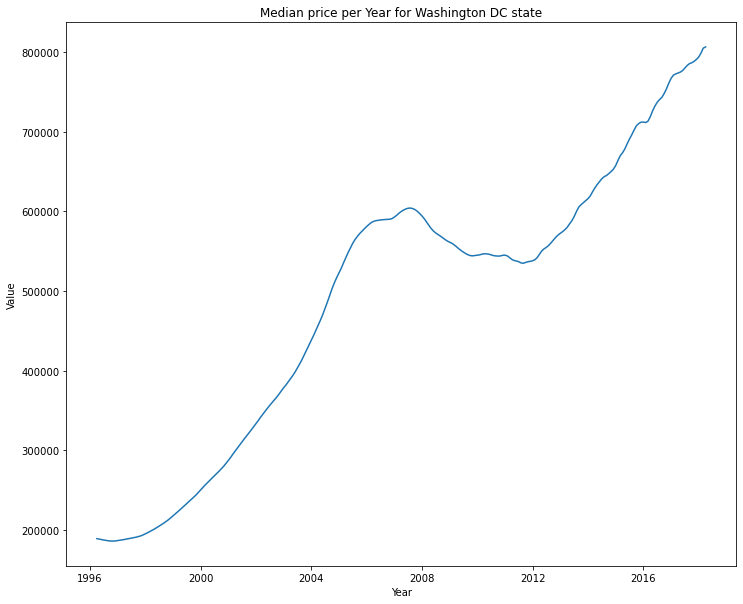

In [16]:
# Washington DC state
state_data = data[data['State'] == 'DC']
yearly_data = state_data.groupby('Date').agg({'Price': 'mean'})

# Ploting the median prices of washington DC over the years
plt.figure(figsize=(12,10))
plt.plot(yearly_data.index, yearly_data['Price'])

plt.title('Median price per Year for Washington DC state')
plt.xlabel('Year')
plt.ylabel('Value')
plt.show()

## 5. Data Preprocessing

In [ ]:
data.head()

In [ ]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[10:], format='%Y-%m')

## 6. EDA and Visualization

In [ ]:
def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank',
                                  'City', 'State', 'Metro', 'CountyName'],var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

### a. Univariate Analysis

In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

### b.Bivariate Analysis

## 7.Feature Engineering

## 8. Modeling

## 9.Evaluation of our Final Model

## 10. Conclusion

## 11. Recommendation and Future Improvement Ideas